In [1]:
import autograd.numpy as anp

In [2]:
from autograd import grad

In [3]:
import autograd.numpy.random as npr

In [4]:
from matplotlib import pyplot as plt

In [6]:
n_x = 20
dx = 1./n_x
n = 1
k = n*anp.pi
A = anp.sqrt(2)

In [7]:
def f(x,psi,dpsi):
    return -(k**2)*psi
def psi_analyticsol(x):
    return A * anp.sin(k*x)

In [10]:
x_space = anp.linspace(0, 1, n_x)
y_space = psi_analyticsol(x_space)

In [11]:
def sigmoid(x):
    return 1./(1. + anp.exp(-x))

In [12]:
def neural_network(W, x):
    n1 = sigmoid(anp.dot(x, W[0]))
    return anp.dot(n1, W[1])

In [13]:
def neural_network_x(x):
    n1 = sigmoid(anp.dot(x, W[0]))
    return anp.dot(n1, W[1])


In [14]:
def psi_trial(x_i, net_out):
    return (anp.pi*A)*x_i + (x_i**2)*net_out

In [18]:
psi_1 = grad(psi_trial)
psi_2 = grad(psi_1)

In [19]:
def loss_function(W,x):
    loss_sum = 0.
    for x_i in x:
        net_out = neural_network(W,x_i)[0][0]
        net_out_1 = grad(neural_network_x)(x_i)
        net_out_2 = grad(grad(neural_network_x))(x_i)

        psi_t = psi_trial(x_i, net_out)

        gradient_of_trial = psi_grad(x_i, net_out)
        second_gradient_of_trial = psi_2(x_i, net_out)

        func = f(x_i, psi_t, gradient_of_trial)  

        err_sqr = (second_gradient_of_trial - func) ** 2
        loss_sum += err_sqr

    return loss_sum

In [34]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(50):
    loss_grad =  grad(loss_function)(W, x_space)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

print (loss_function(W, x_space))
res = [psi_trial(x_i, neural_network(W, x_i)[0][0]) for x_i in x_space]

383.8596853131452


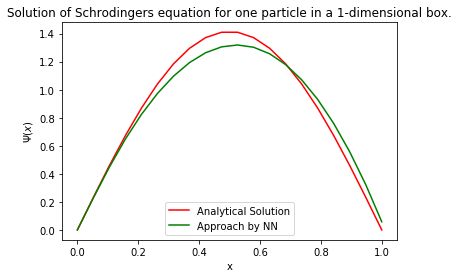

In [35]:
plt.figure()
plt.plot(x_space, y_space,'red', label='Analytical Solution')
plt.plot(x_space, res, 'green', label='Approach by NN')
plt.title('Solution of Schrodingers equation for one particle in a 1-dimensional box.')
plt.xlabel('x')
plt.ylabel(r'$\Psi(x)$')
plt.legend(loc='best', shadow=False)
plt.show()
